<a href="https://colab.research.google.com/github/Tunkara/HassanTunkara/blob/main/LRproject01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
from sklearn.linear_model  import LinearRegression, Ridge, Lasso,SGDRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv("/Ecommerce Customers (1).csv")

In [74]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [75]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [77]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [176]:
y = df['Yearly Amount Spent']
X = df[['Length of Membership','Time on App']]

In [177]:

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1)

In [293]:
model  = Lasso(alpha=0.07)

In [294]:
model.fit(x_train,y_train)

Lasso(alpha=0.07)

In [295]:
y_train_pred = model.predict(x_train)

In [296]:
mean_squared_error(y_train,y_train_pred)

745.8517138736913

In [301]:
y_test_pred = model.predict(x_test)

In [302]:
mean_squared_error(y_test,y_test_pred)

754.1823195525877

In [303]:
w = model.coef_
b = model.intercept_

print('w = ',w)
print('b = ',b)

w =  [62.63408059 37.09331402]
b =  -168.54114011686323


In [305]:
model.score(x_test,y_test)

0.8968246465761015

In [306]:
r2_score(y_test,y_test_pred)

0.8968246465761015

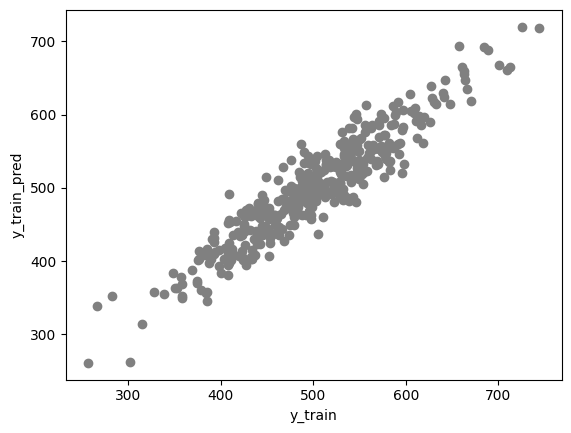

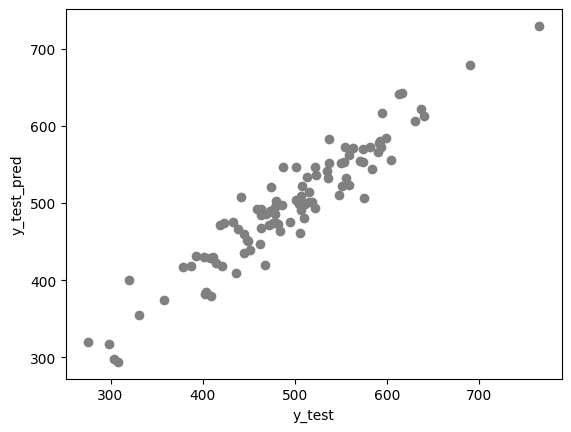

In [317]:


plt.scatter(y_train,y_train_pred, color='gray')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

plt.show()



plt.scatter(y_test,y_test_pred, color='gray')

plt.xlabel('y_test')
plt.ylabel('y_test_pred')

plt.show()





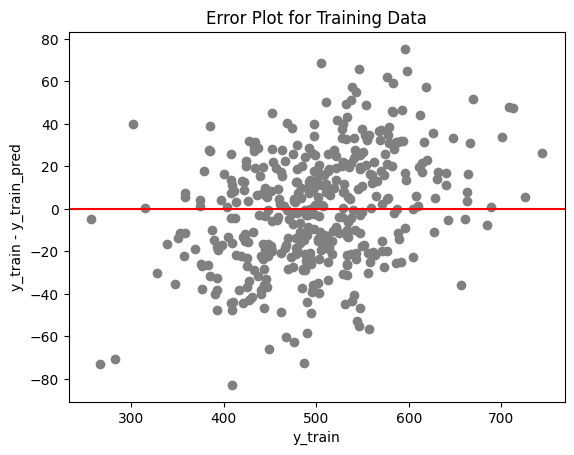

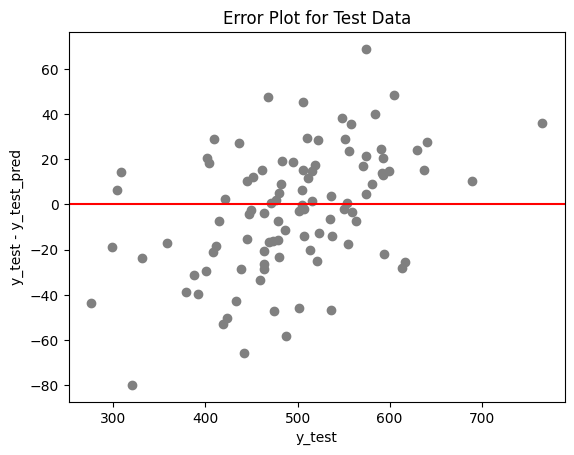

In [319]:
# prompt: plot error plot for both my training and test data

# Plot the error plot for training data
plt.scatter(y_train, y_train - y_train_pred, color='gray')
plt.axhline(y=0, color='red')
plt.xlabel('y_train')
plt.ylabel('y_train - y_train_pred')
plt.title('Error Plot for Training Data')
plt.show()

# Plot the error plot for test data
plt.scatter(y_test, y_test - y_test_pred, color='gray')
plt.axhline(y=0, color='red')
plt.xlabel('y_test')
plt.ylabel('y_test - y_test_pred')
plt.title('Error Plot for Test Data')
plt.show()


In [321]:
df2 = pd.DataFrame(data={
    'actual': y_test,
    'predicted': y_test_pred
})

df2['difference'] = df2['actual'] - df2['predicted']
df2.head()

,actual,predicted,difference
304,494.687156,475.836681,18.850475
340,501.122492,547.127271,-46.004779
47,563.672873,570.873882,-7.201008
67,469.310861,485.911483,-16.600622
479,402.167122,381.790908,20.376214


In [322]:
mean_absolute_error(y_test,y_test_pred)

22.05377106554684

In [329]:
sq = np.abs(df2['difference'])
np.mean(sq)

22.05377106554684